# Analisi approfondita dei datasets del progetto di IUM

In [21]:
# import librerie per una prima analisi dei dati

import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

### funzione ausiliare che stampa il conteggio nei grafici a barre

In [22]:
# Add count values on top of each bar
def add_count_on_bars(ax):
    # Add count values on top of each bar
    for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

##### Lettura del dataset

In [23]:
movies_df = pd.read_csv("Main_data/movies.csv")

## Fase di ispezione dei dati

In [24]:
# una prima ispezione dei dati ci permette di capire come è strutturato il dataset e quanti elementi contiene
print(movies_df.shape)
print(movies_df.columns)
print(movies_df.dtypes)
movies_df.head(10)


(941597, 7)
Index(['id', 'name', 'date', 'tagline', 'description', 'minute', 'rating'], dtype='object')
id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object


,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09
5,1000006,Oppenheimer,2023.0,The world forever changes.,The story of J. Robert Oppenheimer's role in t...,181.0,4.23
6,1000007,Interstellar,2014.0,Mankind was born on Earth. It was never meant ...,The adventures of a group of explorers who mak...,169.0,4.35
7,1000008,Joker,2019.0,Put on a happy face.,"During the 1980s, a failed stand-up comedian i...",122.0,3.85
8,1000009,Dune,2021.0,"Beyond fear, destiny awaits.","Paul Atreides, a brilliant and gifted young ma...",155.0,3.90
9,1000010,Pulp Fiction,1994.0,Just because you are a character doesn't mean ...,"A burger-loving hit man, his philosophical par...",154.0,4.26


##### modifichiamo il tipo di alcune colonne

In [25]:
movies_df["name"] = movies_df["name"].astype("string")
movies_df["date"] = movies_df["date"].astype("Int64")
movies_df.head()

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09


##### controlliamo i valori nulli presenti nel dataset per ogni colonna rilevante 

In [26]:
# decidere se eliminare dei valori nulli o normalizzarli

print(f"ci sono {movies_df['id'].isnull().sum()} film con dei valori nulli per il id")

print(f"ci sono {movies_df['name'].isnull().sum()} film con dei valori nulli per il titolo")

print(f"ci sono {movies_df['date'].isnull().sum()} film con dei valori nulli per data")

print(f"ci sono {movies_df['minute'].isnull().sum()} film con dei valori nulli per il minutaggio")

print(f"ci sono {movies_df['rating'].isnull().sum()} film con dei valori nulli per il rating")

ci sono 0 film con dei valori nulli per il id
ci sono 7 film con dei valori nulli per il titolo
ci sono 91913 film con dei valori nulli per data
ci sono 181570 film con dei valori nulli per il minutaggio
ci sono 850598 film con dei valori nulli per il rating


##### Riduciamo il dataset per mantenere le informazioni importanti

In [ ]:
movies_df = movies_df[["id", "name", "date", "description", "minute", "rating"]]
movies_df.head()

# creo una copia del dataset movies_df
# siccome alla fine delle analisi, il dataset movies_df normalizzato verrà esportato in un nuovo file csv
# creeremo una copia da questo punto in poi per poter fare delle analisi senza modificare il dataset originale 
# che andremo poi ad esportare
movies_df_copy = movies_df.copy()

## Fase di analisi dei dati

In [28]:
# analisi preliminare
movies_df_copy.describe()

,id,date,minute,rating
count,9.415970e+05,849684.000000,760027.000000,90999.000000
mean,1.470799e+06,1998.522300,65.776516,3.244043
std,2.718158e+05,27.534865,154.828161,0.417281
min,1.000001e+06,1874.000000,1.000000,0.880000
25%,1.235400e+06,1986.000000,15.000000,3.020000
50%,1.470799e+06,2010.000000,62.000000,3.300000
75%,1.706198e+06,2019.000000,92.000000,3.510000
max,1.941597e+06,2031.000000,72000.000000,4.690000


In [29]:
# da subito notiamo che alcuni film riportano una durata massima di 72000 minuti. potremmo essere in presenza di alcuni outliesr
# vediamo quanti film superano una certa soglia e quali film superano questo minutaggio
movies_df_copy.loc[movies_df["minute"] > 10000]["id"].count()
movies_df_copy.loc[movies_df["minute"] > 10000]

# dopo un'attenta analisi, il dataset non presenta outliers, anche se nel dataset sono presenti delle serie tv che, per ovvie ragioni, 
# hanno una maggior durata dei film, incontriamo comunque dei film con un minutaggio totale fuori dal comune 


,id,name,date,description,minute,rating
27643,1027644,Logistics,2011,Logistics or Logistics Art Project is an exper...,51420.0,3.28
72276,1072277,Cinématon,1978,Cinématon is a 156-hour long experimental film...,12480.0,NaN
94545,1094546,Modern Times Forever,2011,"The film shows centuries of decay, compressed ...",14400.0,NaN
193178,1193179,Al Zeer Salem,2000,A historical series embodying the character of...,72000.0,NaN
321049,1321050,Svalbard minutt for minutt,2020,A documentary trying to relive the 10 days of ...,13319.0,NaN
451305,1451306,Eighteen Springs,2002,Eighteen Springs (also known as Affair of Half...,58800.0,NaN


#### Calcoliamo tramite un grafico quanti film hanno un minutaggio compreso in un range prestabilito

minute_range
0-30          287251
30-60          89095
60-90         183466
90-120        146790
120-180        39241
180-240         4686
240-1000        7933
1000-10000      1559
10000+             6
Name: id, dtype: int64


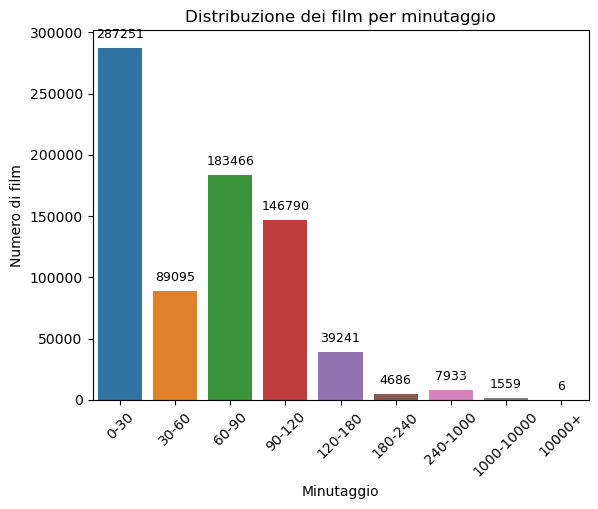

In [30]:
# creaimo una lista con dei range per il minutaggio dei film
min_range = [0, 30, 60, 90, 120, 180, 240, 1000, 10000, float("inf")]
labels = ["0-30", "30-60", "60-90", "90-120", "120-180", "180-240", "240-1000", "1000-10000", "10000+"]

# creiamo una nuova colonna nel dataset che rappresenta il range di minutaggio dei film
movies_df_copy["minute_range"] = pd.cut(movies_df_copy["minute"], bins = min_range, labels = labels)

minute_range = movies_df_copy.groupby("minute_range")["id"].count()
print(minute_range)

ax = sns.countplot(x = "minute_range", data = movies_df_copy, order = labels)
add_count_on_bars(ax)
ax.set_title("Distribuzione dei film per minutaggio")
ax.set_xlabel("Minutaggio")
ax.set_ylabel("Numero di film")
plt.xticks(rotation = 45)
plt.show()


#### calcolo del rating medio per ogni categoria di range tenendo conto del totale dei film

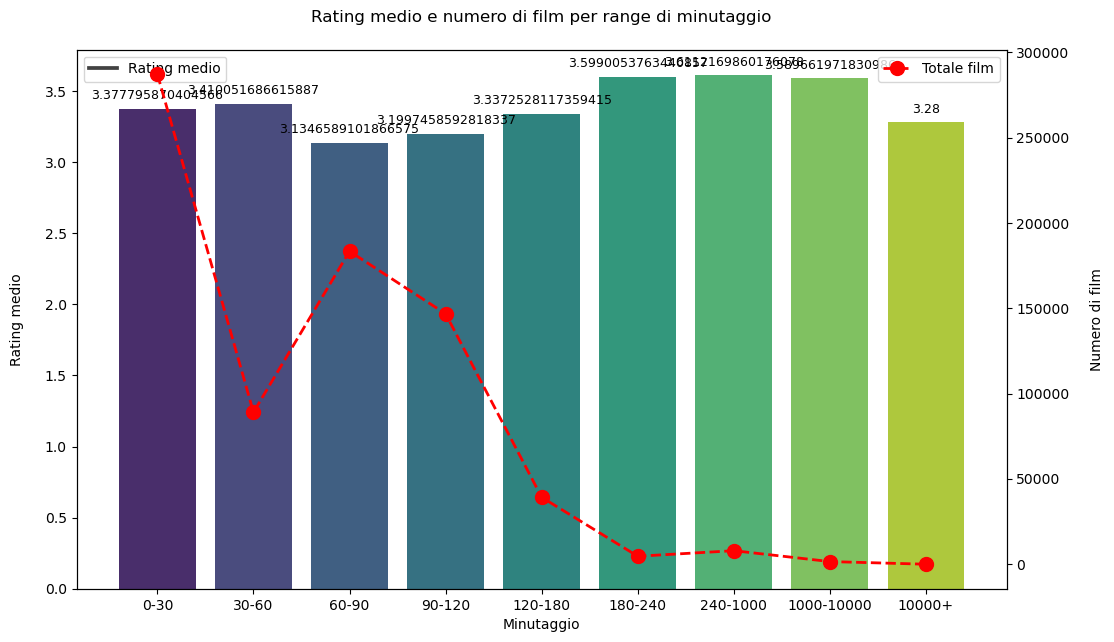

In [31]:
# Calcola rating medio e il totale dei film per ogni range
average_ratings = movies_df_copy.groupby("minute_range")["rating"].mean()
total_counts = movies_df_copy.groupby("minute_range")["id"].count()

# Prepara il grafico combinato
fig, ax = plt.subplots(figsize=(12, 7))

# Barre per il rating medio (asse sinistro)
sns.barplot(
    x=average_ratings.index, 
    y=average_ratings.values, 
    order=labels, 
    ax=ax,
    palette="viridis"
)
ax.set_title("Rating medio e numero di film per range di minutaggio", pad=20)
ax.set_xlabel("Minutaggio")
ax.set_ylabel("Rating medio", labelpad=15)

# Linea per il conteggio totale (asse destro)
ax2 = ax.twinx()
total_counts.plot(
    ax=ax2, 
    marker="o", 
    color="red", 
    linewidth=2, 
    linestyle="dashed", 
    markersize=10, 
    label="Totale film"
)
ax2.set_ylabel("Numero di film", labelpad=15)

add_count_on_bars(ax)

ax.legend(["Rating medio"], loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()


#### Analisi simile alla precendente ma questa volta analizziamo l'annata dei film

1874
2031


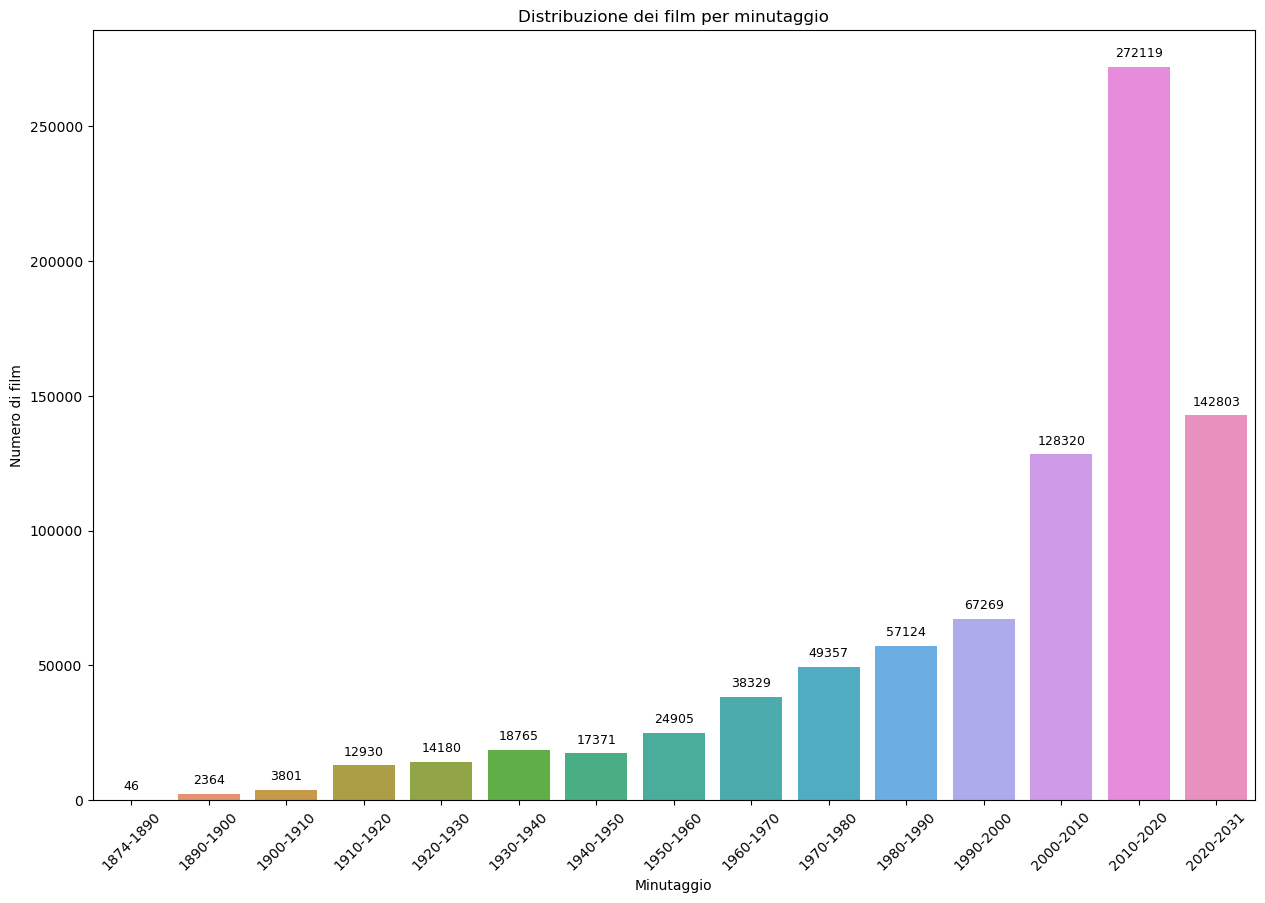

In [32]:
# creaimo una lista con dei range per la data di uscita dei film
print(movies_df_copy["date"].min())
print(movies_df_copy["date"].max())
data_range = [movies_df_copy["date"].min(), 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, movies_df["date"].max()]
labels = ["1874-1890", "1890-1900", "1900-1910", "1910-1920", "1920-1930", "1930-1940", "1940-1950", "1950-1960", "1960-1970", "1970-1980", "1980-1990", "1990-2000", "2000-2010", "2010-2020", "2020-2031"]

movies_df_copy["date_range"] = pd.cut(movies_df["date"], bins = data_range, labels = labels)
movies_df_copy.groupby("date_range")["id"].count()

plt.figure(figsize = (15, 10))

ax = sns.countplot(x = "date_range", data = movies_df_copy, order = labels)
add_count_on_bars(ax)
ax.set_title("Distribuzione dei film per minutaggio")
ax.set_xlabel("Minutaggio")
ax.set_ylabel("Numero di film")
plt.xticks(rotation = 45)
plt.show()

##### anche in questo caso sfruttiamo un grafico combinato per poter rappresentare il rating medio rapportato al numero di film per categoria

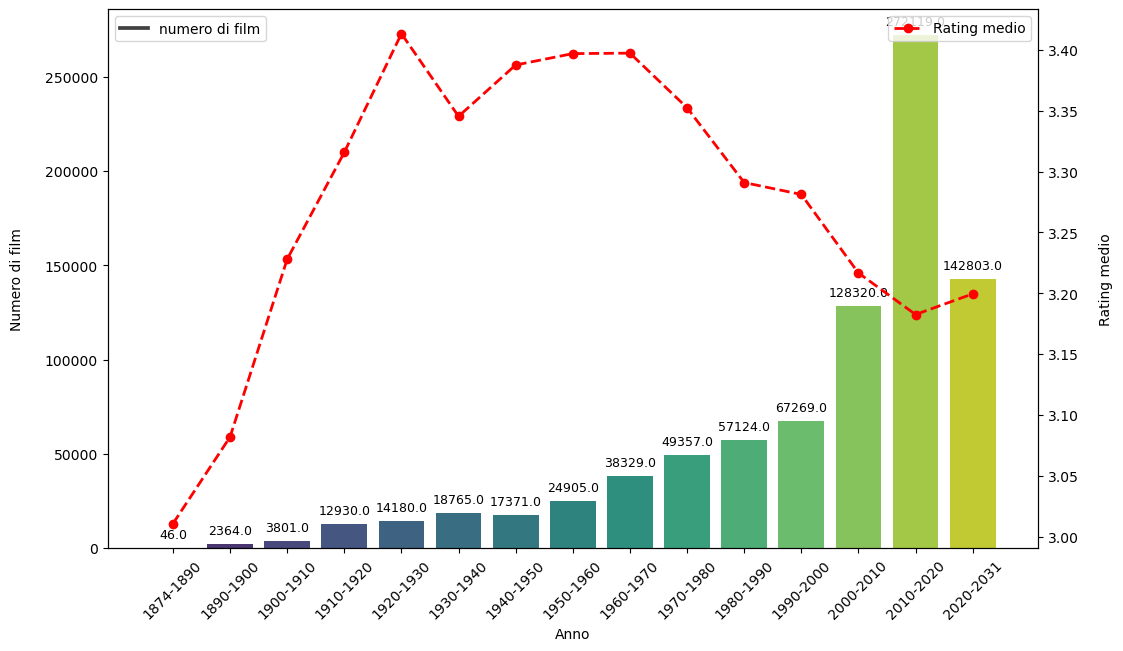

In [33]:
average_ratings = movies_df_copy.groupby("date_range")["rating"].mean()
total_counts = movies_df_copy.groupby("date_range")["id"].count()

# Prepara il grafico combinato
fig, ax = plt.subplots(figsize=(12, 7))

# Barre per il rating medio (asse sinistro)
sns.barplot(
    x=total_counts.index, 
    y=total_counts.values, 
    order=labels, 
    ax=ax,
    palette="viridis"
)
ax.set_xlabel("Anno")
ax.set_ylabel("Numero di film", labelpad=15)

ax2 = ax.twinx()
average_ratings.plot(
    ax = ax2,
    marker = "o",
    color = "red",
    linewidth = 2,
    linestyle = "dashed",
    label = "Rating medio"
)

ax2.set_ylabel("Rating medio", labelpad = 15)
add_count_on_bars(ax)

ax.legend(["numero di film"], loc='upper left')
ax2.legend(loc='upper right')
ax.xaxis.set_tick_params(rotation = 45)
plt.show()


In [ ]:
# Esportiamo il dataset dopo aver rimosso elementi non necessari per rendere il dataset più pulito
movies_df.to_csv("File normalizzati/movies_normalized.csv", index=False)